<a href="https://colab.research.google.com/github/ThuyHaLE/Problem3_Natural-Language-Processing/blob/main/NLP_Preprocessing_using_spaCy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Natural Language Processing | Preprocessing**

https://nlpdemystified.org<br>
https://github.com/futuremojo/nlp-demystified

**Language Processing Pipelines**
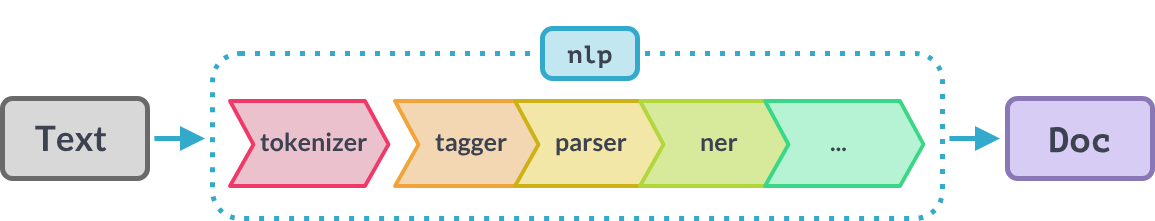

**spaCy** <Br>
https://github.com/explosion/spaCy <Br>
https://spacy.io/

At the time this notebook was created, spaCy had newer releases but Colab was still using version 2.x by default. So the first step is to upgrade spaCy.
<br><br>
**IMPORTANT**<br>
If you're running this in the cloud rather than using a local Jupyter server on your machine, then the notebook will **timeout** after a period of inactivity. If that happens and you don't reconnect in time, you will need to upgrade spaCy again and reinstall the requisite statistical packages.
<br><br>
Refer to this link on how to run Colab notebooks locally on your machine to avoid this issue:<br>
https://research.google.com/colaboratory/local-runtimes.html

In [ ]:
!pip -q install -U spacy==3.*
!python -m spacy info

In [ ]:
import spacy

After importing spaCy, the next thing we need to do is load a suitable statistical model for our project. spaCy offers a variety of models for different languages. These models help with tokenization, part-of-speech tagging, named entity recognition, and more.

Since we upgraded spaCy, we'll need to download the statistical model as well.

In [ ]:
#English

#English pipeline optimized for CPU. Components: tok2vec, tagger, parser, senter, ner, attribute_ruler, lemmatizer.
#=> en_core_web_sm, en_core_web_md, en_core_web_lg

#English transformer pipeline (Transformer(name=‘roberta-base’, piece_encoder=‘byte-bpe’, stride=104, type=‘roberta’, width=768, window=144, vocab_size=50265)).
#Components: transformer, tagger, parser, ner, attribute_ruler, lemmatizer. => en_core_web_trf

!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 55.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


**en_core_web_sm** is trained on OntoNotes 5 which is an annotated corpus comprising news, blogs, transcripts, etc. Put simply, this means a bunch of documents were labelled with information such as how each sentence should be parsed, whether a particular word is a noun or adjective or other part-of-speech, whether a word is a special entity like a person or a real-world organization, and other language-related labels. A statistical model was then generated from these labelled documents.<br>
https://catalog.ldc.upenn.edu/LDC2013T19
<br><br>

In [ ]:
#Multi-language

#Multi-language pipeline optimized for CPU. Components: senter. => xx_sent_ud_sm
#Multi-language pipeline optimized for CPU. Components: ner. => xx_ent_wiki_sm
!python -m spacy download xx_ent_wiki_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 75.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('xx_ent_wiki_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


### Tokenization using spaCy

We pass whatever text we want to process to _nlp_, which returns a **Doc** container object containing the tokenized text and a number of annotations for each token. We can iterate over this **Doc** object and view the tokens.

In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')
type(nlp)

spacy.lang.en.English

In [ ]:
# Sample sentence.
nlp = spacy.load('en_core_web_sm')
s = "He didn't want to pay $20 for this book."
doc = nlp(s)
print(f'Token list: {[t.text for t in doc]}')

##The **Doc** object can be indexed and sliced like a regular list.
##The **Doc** object contains **Token** and **Span** objects, which offer different views into the text.

# We can view an individual token by indexing into the Doc object.
print(f'The first element: {[doc[0]]}')
# A Doc object is a container of other objects, namely Token and Span objects.
print(f'Type of the first element: {type(doc[0])}')
# Slicing a Doc object returns a Span object.
print(f'The first three elements: {[i for i in doc[0:3]]}')
print(f'Type of the first three elements: {type(doc[0:3])}')
# Access a token's index in a sentence.
print(f'All elements and their positions: {[(t.text, t.i) for t in doc]}')

##Spacy's tokenization is _non-destructive_, which means the original input can be reconstructed from the tokens.

# You can view the original input like so:
print(f'The original input: {doc.text}')

Token list: ['He', 'did', "n't", 'want', 'to', 'pay', '$', '20', 'for', 'this', 'book', '.']
The first element: [He]
Type of the first element: <class 'spacy.tokens.token.Token'>
The first three elements: [He, did, n't]
Type of the first three elements: <class 'spacy.tokens.span.Span'>
All elements and their positions: [('He', 0), ('did', 1), ("n't", 2), ('want', 3), ('to', 4), ('pay', 5), ('$', 6), ('20', 7), ('for', 8), ('this', 9), ('book', 10), ('.', 11)]
The original input: He didn't want to pay $20 for this book.


In [ ]:
import spacy
multi_nlp = spacy.load('xx_ent_wiki_sm')
type(multi_nlp)

spacy.lang.xx.MultiLanguage

In [ ]:
# Sample sentence.
multi_nlp = spacy.load('xx_ent_wiki_sm')
s = "Anh ta không muốn trả 20 đô la cho quyển sách này"
doc = multi_nlp(s)
print(f'Token list: {[t.text for t in doc]}')

##The **Doc** object can be indexed and sliced like a regular list.
##The **Doc** object contains **Token** and **Span** objects, which offer different views into the text.

# We can view an individual token by indexing into the Doc object.
print(f'The first element: {[doc[0]]}')
# A Doc object is a container of other objects, namely Token and Span objects.
print(f'Type of the first element: {type(doc[0])}')
# Slicing a Doc object returns a Span object.
print(f'The first three elements: {[i for i in doc[0:3]]}')
print(f'Type of the first three elements: {type(doc[0:3])}')
# Access a token's index in a sentence.
print(f'All elements and their positions: {[(t.text, t.i) for t in doc]}')

##Spacy's tokenization is _non-destructive_, which means the original input can be reconstructed from the tokens.

# You can view the original input like so:
print(f'The original input: {doc.text}')

Token list: ['Anh', 'ta', 'không', 'muốn', 'trả', '20', 'đô', 'la', 'cho', 'quyển', 'sách', 'này']
The first element: [Anh]
Type of the first element: <class 'spacy.tokens.token.Token'>
The first three elements: [Anh, ta, không]
Type of the first three elements: <class 'spacy.tokens.span.Span'>
All elements and their positions: [('Anh', 0), ('ta', 1), ('không', 2), ('muốn', 3), ('trả', 4), ('20', 5), ('đô', 6), ('la', 7), ('cho', 8), ('quyển', 9), ('sách', 10), ('này', 11)]
The original input: Anh ta không muốn trả 20 đô la cho quyển sách này


In [ ]:
# We can also tokenize multiple sentences and access each sentence individually using the **Doc** object's _sents_ property.
import spacy
nlp = spacy.load('en_core_web_sm')

s = """Either the well was very deep, or she fell very slowly, for she had plenty of time as she went down to look about her and to wonder what
was going to happen next. First, she tried to look down and make out what she was coming to, but it was too dark to see anything; then she looked at
the sides of the well, and noticed that they were filled with cupboards and book-shelves; here and there she saw maps and pictures hung upon pegs."""

doc = nlp(s)

# Access a token's index in a sentence.
print(f'All elements and their positions: {[(t.text, t.i) for t in doc]}')

# Look at individual sentences (there should be two 'Span' objects).
print(f'All elements as sentences: {[(id, i) for i, id in enumerate([t for t in doc.sents])]}')

All elements and their positions: [('Either', 0), ('the', 1), ('well', 2), ('was', 3), ('very', 4), ('deep', 5), (',', 6), ('or', 7), ('she', 8), ('fell', 9), ('very', 10), ('slowly', 11), (',', 12), ('for', 13), ('she', 14), ('had', 15), ('plenty', 16), ('of', 17), ('time', 18), ('as', 19), ('she', 20), ('went', 21), ('down', 22), ('to', 23), ('look', 24), ('about', 25), ('her', 26), ('and', 27), ('to', 28), ('wonder', 29), ('what', 30), ('\n', 31), ('was', 32), ('going', 33), ('to', 34), ('happen', 35), ('next', 36), ('.', 37), ('First', 38), (',', 39), ('she', 40), ('tried', 41), ('to', 42), ('look', 43), ('down', 44), ('and', 45), ('make', 46), ('out', 47), ('what', 48), ('she', 49), ('was', 50), ('coming', 51), ('to', 52), (',', 53), ('but', 54), ('it', 55), ('was', 56), ('too', 57), ('dark', 58), ('to', 59), ('see', 60), ('anything', 61), (';', 62), ('then', 63), ('she', 64), ('looked', 65), ('at', 66), ('\n', 67), ('the', 68), ('sides', 69), ('of', 70), ('the', 71), ('well', 72)

In [ ]:
# Look through https://spacy.io/api/token#attributes on how to check whether a token is a currency symbol or a number.
# Expected output: "$20".
nlp = spacy.load('en_core_web_sm')
s = "He didn't want to pay $20 or $25 for this book."
doc = nlp(s)
print([w.text for w in doc])

['He', 'did', "n't", 'want', 'to', 'pay', '$', '20', 'or', '$', '25', 'for', 'this', 'book', '.']


In [ ]:
# https://spacy.io/usage/linguistic-features#tokenization
import re
from spacy.symbols import ORTH
nlp = spacy.load('en_core_web_sm')
special_cases = re.findall(r'\$\s*\d+', s)
for c in special_cases:
  special_case = [{ORTH: c}]
  nlp.tokenizer.add_special_case(c, special_case)
print([w.text for w in nlp(s)])

['He', 'did', "n't", 'want', 'to', 'pay', '$20', 'or', '$25', 'for', 'this', 'book', '.']


In [ ]:
s = "Let's go to N.Y.C. for the weekend. Around $200 for one person."
nlp = spacy.load('en_core_web_sm')
print([w.text for w in nlp(s)])

['Let', "'s", 'go', 'to', 'N.Y.C.', 'for', 'the', 'weekend', '.', 'Around', '$', '200', 'for', 'one', 'person', '.']


### Tokenization using nltk

In [ ]:
import nltk
from nltk.tokenize import TreebankWordTokenizer
s = "Let's go to N.Y.C. for the weekend. Around $200 for one person."
print([w for w in TreebankWordTokenizer().tokenize(s)])

['Let', "'s", 'go', 'to', 'N.Y.C.', 'for', 'the', 'weekend.', 'Around', '$', '200', 'for', 'one', 'person', '.']


In [ ]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+|\$[\d.]+|.\S+') #\$\s*\d+
print([w for w in tokenizer.tokenize(s)])

['Let', "'s", ' go', ' to', ' N.Y.C.', ' for', ' the', ' weekend.', ' Around', ' $200', ' for', ' one', ' person.']


**NOTE**: Different tokenizers will give subtly different results based on the rules they use. Experiment with different tokenizers and use the one best suited for your project.

# Basic Preprocessing

In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')
s = "He told Dr. Lovato that he was done with the tests and would post the results shortly."
doc = nlp(s)
print(f'Token list: {[t.text for t in doc]}')

Token list: ['He', 'told', 'Dr.', 'Lovato', 'that', 'he', 'was', 'done', 'with', 'the', 'tests', 'and', 'would', 'post', 'the', 'results', 'shortly', '.']


### Case-Folding

In [ ]:
#Case-Folding
print(f'Case-Folding for all tokens: {[t.lower_ for t in doc]}')
#Skip case-folding if a token is the start of a sentence
print(f'Skip case-folding if a token is the start of a sentence: {[t.lower_ if not t.is_sent_start else t for t in doc]}')

Case-Folding for all tokens: ['he', 'told', 'dr.', 'lovato', 'that', 'he', 'was', 'done', 'with', 'the', 'tests', 'and', 'would', 'post', 'the', 'results', 'shortly', '.']
Skip case-folding if a token is the start of a sentence: [He, 'told', 'dr.', 'lovato', 'that', 'he', 'was', 'done', 'with', 'the', 'tests', 'and', 'would', 'post', 'the', 'results', 'shortly', '.']


### Stop Word Removal

In [ ]:
#Stop Word Removal
import spacy
#spaCy's default stop word list.
print(f'stop word list: {nlp.Defaults.stop_words}')
print(f'number of stop words: {len(nlp.Defaults.stop_words)}')
#check if token in stop words list
print(f'token in stop words list: {[t for t in nlp(s) if t.is_stop]}')

print(f'Remove stop words: {[t for t in nlp(s) if not t.is_stop]}')

stop word list: {'using', 'were', 'side', 'without', 'than', 'whereafter', 'where', 'how', 'along', 'done', 'really', 'here', 'whence', 'who', 'does', 'below', 'next', 'me', 'did', 'five', 'whole', 'therein', 'namely', 'towards', 'n‘t', '‘d', 'yourselves', 'however', 'take', 'often', 'our', 'fifty', 'his', 'ca', 'before', 'moreover', 'eight', 'them', 'because', 'full', 'too', 'noone', "'d", 'formerly', 'please', 'there', 'behind', 'down', 'your', 'hundred', 'seems', 'used', 'whereas', 'what', 'former', 'whether', 'why', 'herein', 'seemed', 'being', 'third', 'which', "'m", 'him', 'it', 'least', 'about', 'under', 'or', 'from', 'make', 'hereby', 'he', '’d', 'beside', 'that', 'doing', 'has', 'thus', '‘ve', 'almost', 'rather', 'herself', 'otherwise', 'name', 'for', 'ever', 'these', 'can', 'empty', 'although', 'amount', 'front', 'any', 'becoming', 'forty', 'everything', 'into', 'one', 'six', 'up', 'becomes', 'but', 'this', 'sixty', 'yet', 'after', 'would', 'enough', "'ve", 'among', 'fifteen'

In [ ]:
#Add a stop word
import spacy
nlp.Defaults.stop_words.add("told")
for stopword in nlp.Defaults.stop_words:
    nlp.vocab[stopword].is_stop = True
print(f'stop word list: {nlp.Defaults.stop_words}')
print(f'number of stop words: {len(nlp.Defaults.stop_words)}')

#check if token in stop words list
print(f'token in stop words list: {[t for t in nlp(s) if t.is_stop]}')
print(f'Remove stop words: {[t for t in nlp(s) if not t.is_stop]}')

stop word list: {'using', 'were', 'side', 'without', 'than', 'whereafter', 'where', 'how', 'along', 'done', 'really', 'here', 'whence', 'who', 'does', 'below', 'next', 'me', 'did', 'five', 'whole', 'therein', 'namely', 'towards', 'n‘t', '‘d', 'yourselves', 'however', 'take', 'often', 'our', 'fifty', 'his', 'ca', 'before', 'moreover', 'eight', 'them', 'because', 'full', 'too', 'noone', "'d", 'formerly', 'please', 'there', 'behind', 'down', 'your', 'hundred', 'seems', 'used', 'whereas', 'what', 'former', 'whether', 'why', 'herein', 'seemed', 'being', 'third', 'which', "'m", 'him', 'it', 'least', 'about', 'under', 'or', 'from', 'make', 'hereby', 'he', '’d', 'beside', 'that', 'doing', 'has', 'thus', '‘ve', 'almost', 'rather', 'herself', 'otherwise', 'name', 'for', 'ever', 'these', 'can', 'empty', 'although', 'amount', 'front', 'any', 'becoming', 'forty', 'everything', 'into', 'one', 'six', 'up', 'becomes', 'but', 'this', 'sixty', 'yet', 'after', 'would', 'enough', "'ve", 'among', 'fifteen'

In [ ]:
#Remove a stop word
import spacy
nlp.Defaults.stop_words.remove("told")
nlp.vocab["told"].is_stop = False
print(f'stop word list: {nlp.Defaults.stop_words}')
print(f'number of stop words: {len(nlp.Defaults.stop_words)}')

#check if token in stop words list
print(f'token in stop words list: {[t for t in nlp(s) if t.is_stop]}')
print(f'Remove stop words: {[t for t in nlp(s) if not t.is_stop]}')

stop word list: {'using', 'were', 'side', 'without', 'than', 'whereafter', 'where', 'how', 'along', 'done', 'really', 'here', 'whence', 'who', 'does', 'below', 'next', 'me', 'did', 'five', 'whole', 'therein', 'namely', 'towards', 'n‘t', '‘d', 'yourselves', 'however', 'take', 'often', 'our', 'fifty', 'his', 'ca', 'before', 'moreover', 'eight', 'them', 'because', 'full', 'too', 'noone', "'d", 'formerly', 'please', 'there', 'behind', 'down', 'your', 'hundred', 'seems', 'used', 'whereas', 'what', 'former', 'whether', 'why', 'herein', 'seemed', 'being', 'third', 'which', "'m", 'him', 'it', 'least', 'about', 'under', 'or', 'from', 'make', 'hereby', 'he', '’d', 'beside', 'that', 'doing', 'has', 'thus', '‘ve', 'almost', 'rather', 'herself', 'otherwise', 'name', 'for', 'ever', 'these', 'can', 'empty', 'although', 'amount', 'front', 'any', 'becoming', 'forty', 'everything', 'into', 'one', 'six', 'up', 'becomes', 'but', 'this', 'sixty', 'yet', 'after', 'would', 'enough', "'ve", 'among', 'fifteen'

In [ ]:
#Add some stop words
ad_words = {'Dr.', 'Lovato','results', 'shortly'}
nlp.Defaults.stop_words |= ad_words
for stopword in ad_words:
    nlp.vocab[stopword].is_stop = True
print(f'stop word list: {nlp.Defaults.stop_words}')
print(f'number of stop words: {len(nlp.Defaults.stop_words)}')

#check if token in stop words list
print(f'token in stop words list: {[t for t in nlp(s) if t.is_stop]}')
print(f'Remove stop words: {[t for t in nlp(s) if not t.is_stop]}')

stop word list: {'using', 'were', 'side', 'without', 'than', 'whereafter', 'where', 'how', 'along', 'done', 'really', 'here', 'whence', 'who', 'does', 'below', 'next', 'me', 'did', 'five', 'whole', 'therein', 'namely', 'towards', 'n‘t', '‘d', 'yourselves', 'however', 'take', 'often', 'Dr.', 'our', 'fifty', 'his', 'ca', 'before', 'moreover', 'eight', 'them', 'because', 'full', 'too', 'shortly', 'noone', "'d", 'formerly', 'please', 'there', 'behind', 'down', 'your', 'hundred', 'seems', 'used', 'whereas', 'what', 'former', 'whether', 'why', 'herein', 'seemed', 'being', 'third', 'which', "'m", 'him', 'it', 'least', 'about', 'under', 'or', 'from', 'make', 'hereby', 'he', '’d', 'beside', 'that', 'doing', 'has', 'thus', '‘ve', 'almost', 'rather', 'herself', 'otherwise', 'name', 'for', 'ever', 'these', 'can', 'empty', 'although', 'amount', 'front', 'any', 'becoming', 'forty', 'everything', 'into', 'one', 'six', 'up', 'becomes', 'but', 'this', 'sixty', 'yet', 'after', 'would', 'enough', "'ve", 

In [ ]:
#Remove some stop words
rm_words = {'Dr.', 'Lovato','results', 'shortly'}
nlp.Defaults.stop_words -= rm_words
for stopword in rm_words:
    nlp.vocab[stopword].is_stop = False
print(f'stop word list: {nlp.Defaults.stop_words}')
print(f'number of stop words: {len(nlp.Defaults.stop_words)}')

#check if token in stop words list
print(f'token in stop words list: {[t for t in nlp(s) if t.is_stop]}')
print(f'Remove stop words: {[t for t in nlp(s) if not t.is_stop]}')

stop word list: {'using', 'were', 'side', 'without', 'than', 'whereafter', 'where', 'how', 'along', 'done', 'really', 'here', 'whence', 'who', 'does', 'below', 'next', 'me', 'did', 'five', 'whole', 'therein', 'namely', 'towards', 'n‘t', '‘d', 'yourselves', 'however', 'take', 'often', 'our', 'fifty', 'his', 'ca', 'before', 'moreover', 'eight', 'them', 'because', 'full', 'too', 'noone', "'d", 'formerly', 'please', 'there', 'behind', 'down', 'your', 'hundred', 'seems', 'used', 'whereas', 'what', 'former', 'whether', 'why', 'herein', 'seemed', 'being', 'third', 'which', "'m", 'him', 'it', 'least', 'about', 'under', 'or', 'from', 'make', 'hereby', 'he', '’d', 'beside', 'that', 'doing', 'has', 'thus', '‘ve', 'almost', 'rather', 'herself', 'otherwise', 'name', 'for', 'ever', 'these', 'can', 'empty', 'although', 'amount', 'front', 'any', 'becoming', 'forty', 'everything', 'into', 'one', 'six', 'up', 'becomes', 'but', 'this', 'sixty', 'yet', 'after', 'would', 'enough', "'ve", 'among', 'fifteen'

### Lemmatization

In [ ]:
#Lemmatization
print(f'Apply lemmatization: {[f"({t.text} => {t.lemma_})" for t in doc]}')

Apply lemmatization: ['(He => he)', '(told => tell)', '(Dr. => Dr.)', '(Lovato => Lovato)', '(that => that)', '(he => he)', '(was => be)', '(done => do)', '(with => with)', '(the => the)', '(tests => test)', '(and => and)', '(would => would)', '(post => post)', '(the => the)', '(results => result)', '(shortly => shortly)', '(. => .)']


###Stemmer

In [ ]:
#SnowballStemmer

from nltk.stem.snowball import SnowballStemmer
s = 'He told Dr. Lovato that he was done with the tests and would post the results shortly.'

# Initialize the stemmer
snow_stemmer = SnowballStemmer(language='english')

#Tokenize, stem, and print the tokens.
print(f'Apply SnowballStemmer: {[f"({t.text} => {snow_stemmer.stem(t.text)})" for t in nlp(s)]}')

Apply SnowballStemmer: ['(He => he)', '(told => told)', '(Dr. => dr.)', '(Lovato => lovato)', '(that => that)', '(he => he)', '(was => was)', '(done => done)', '(with => with)', '(the => the)', '(tests => test)', '(and => and)', '(would => would)', '(post => post)', '(the => the)', '(results => result)', '(shortly => short)', '(. => .)']


In [ ]:
#PorterStemmer
from nltk.stem import PorterStemmer

s = 'He told Dr. Lovato that he was done with the tests and would post the results shortly.'

# Initialize the stemmer
porter_stemmer = PorterStemmer()

#Tokenize, stem, and print the tokens.
print(f'Apply PorterStemmer: {[f"({t.text} => {porter_stemmer.stem(t.text)})" for t in nlp(s)]}')

Apply PorterStemmer: ['(He => he)', '(told => told)', '(Dr. => dr.)', '(Lovato => lovato)', '(that => that)', '(he => he)', '(was => wa)', '(done => done)', '(with => with)', '(the => the)', '(tests => test)', '(and => and)', '(would => would)', '(post => post)', '(the => the)', '(results => result)', '(shortly => shortli)', '(. => .)']


#Advanced Preprocessing <Br>
Part-of-Speech Tagging, Named Entity Recognition, and Parsing.

In [ ]:
!pip -q install -U spacy==3.*
!python -m spacy download en_core_web_sm
!python -m spacy info

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 36.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.

============================== Info about spaCy ==============================

spaCy version    3.7.4                         
Location         /usr/local/lib/python3.10/dist-packages/spacy
Platform         Linux-6.1.58+-x86_64-with-glibc2.35
Python version   3.10.12                       
Pipelines        en_core_web_sm (3.7.1)        



##Part-of-Speech Tagging

In [ ]:
#Part-of-Speech Tagging
#course-grained tags (.pos_)
import spacy
nlp = spacy.load('en_core_web_sm')
s = "John watched an old movie at the cinema."
doc = nlp(s)
[(t.text, t.pos_, spacy.explain(t.pos_)) for t in doc]

[('John', 'PROPN', 'proper noun'),
 ('watched', 'VERB', 'verb'),
 ('an', 'DET', 'determiner'),
 ('old', 'ADJ', 'adjective'),
 ('movie', 'NOUN', 'noun'),
 ('at', 'ADP', 'adposition'),
 ('the', 'DET', 'determiner'),
 ('cinema', 'NOUN', 'noun'),
 ('.', 'PUNCT', 'punctuation')]

In [ ]:
#Part-of-Speech Tagging
#fine-grained tags (.tag_)
import spacy
nlp = spacy.load('en_core_web_sm')
s = "John watched an old movie at the cinema."
doc = nlp(s)
[(t.text, t.tag_, spacy.explain(t.tag_)) for t in doc]

[('John', 'NNP', 'noun, proper singular'),
 ('watched', 'VBD', 'verb, past tense'),
 ('an', 'DT', 'determiner'),
 ('old', 'JJ', 'adjective (English), other noun-modifier (Chinese)'),
 ('movie', 'NN', 'noun, singular or mass'),
 ('at', 'IN', 'conjunction, subordinating or preposition'),
 ('the', 'DT', 'determiner'),
 ('cinema', 'NN', 'noun, singular or mass'),
 ('.', '.', 'punctuation mark, sentence closer')]

##Named Entity Recognition

In [ ]:
# Named Entity Recognition (.ent_type_)
import spacy
nlp = spacy.load('en_core_web_sm')
s = "Volkswagen is developing an electric sedan which could potentially come to America next fall."
doc = nlp(s)
[(t.text, t.ent_type_) for t in doc]
[(t.text, t.ent_type_, spacy.explain(t.ent_type_)) for t in doc if t.ent_type_ != ''] #if t.ent_type != 0

[('Volkswagen', 'ORG', 'Companies, agencies, institutions, etc.'),
 ('America', 'GPE', 'Countries, cities, states'),
 ('next', 'DATE', 'Absolute or relative dates or periods'),
 ('fall', 'DATE', 'Absolute or relative dates or periods')]

In [ ]:
# Named Entity Recognition (.ents and .label_)
import spacy
nlp = spacy.load('en_core_web_sm')
s = "Volkswagen is developing an electric sedan which could potentially come to America next fall."
doc = nlp(s)
print([(ent.text, ent.label_) for ent in doc.ents])

# Named Entity Recognition (access the positions of entities)
print([(ent.text, ent.label_, ent.start_char, ent.end_char) for ent in doc.ents])

[('Volkswagen', 'ORG'), ('America', 'GPE'), ('next fall', 'DATE')]
[('Volkswagen', 'ORG', 0, 10), ('America', 'GPE', 75, 82), ('next fall', 'DATE', 83, 92)]


In [ ]:
# Named Entity Recognition (visualize the entities)
# We need to set the 'jupyter' variable to True in order to output the visualization directly. Otherwise, you'll get raw HTML.
from spacy import displacy
s = "Volkswagen is developing an electric sedan which could potentially come to America next fall."
doc = nlp(s)
print(s)
displacy.render(doc, style='ent', jupyter=True)

s = "Ridley Scott directed The Martian."
doc = nlp(s)
print(s)
displacy.render(doc, style='ent', jupyter=True)

Volkswagen is developing an electric sedan which could potentially come to America next fall.


Ridley Scott directed The Martian.


In [ ]:
#identify the dates in this sentence.
# Expected output: ['Feb 13th', 'Feb 24th']
import spacy
from spacy import displacy
nlp = spacy.load('en_core_web_sm')
s = "We'll be in Osaka on Feb 13th and leave on Feb 24th."
doc = nlp(s)
print([ent.text for ent in doc.ents if ent.label_ == 'DATE'])
displacy.render(doc, style='ent', jupyter=True)

['Feb 13th', 'Feb 24th']


##Parsing

In [ ]:
# Parsing (visualize the entities)
s = "She enrolled in the course at the university."
doc = nlp(s)

# Note the 'style' argument is assigned a 'dep' flag this time around.
displacy.render(doc, style='dep', jupyter=True)

The visualization above is for a dependency parse (spaCy doesn't come with a constituency parser). For each pair of depencencies, spaCy visualizes the child (pointed to), the head (pointed from), and their relationship (the label arc). You can view the dependency annotations here:<br>
https://spacy.io/api/annotation#dependency-parsing

In [ ]:
# Parsing (.dep_)
[(t.text, t.dep_, spacy.explain(t.dep_)) for t in doc]

[('She', 'nsubj', 'nominal subject'),
 ('enrolled', 'ROOT', 'root'),
 ('in', 'prep', 'prepositional modifier'),
 ('the', 'det', 'determiner'),
 ('course', 'pobj', 'object of preposition'),
 ('at', 'prep', 'prepositional modifier'),
 ('the', 'det', 'determiner'),
 ('university', 'pobj', 'object of preposition'),
 ('.', 'punct', 'punctuation')]

In [ ]:
# Parsing (head of each dependency using to show how the words are related to each other (the arcs))
[(t.text, t.dep_, t.head.text) for t in doc]

[('She', 'nsubj', 'enrolled'),
 ('enrolled', 'ROOT', 'enrolled'),
 ('in', 'prep', 'enrolled'),
 ('the', 'det', 'course'),
 ('course', 'pobj', 'in'),
 ('at', 'prep', 'course'),
 ('the', 'det', 'university'),
 ('university', 'pobj', 'at'),
 ('.', 'punct', 'enrolled')]

##spaCy's Matcher <br>
https://spacy.io/usage/rule-based-matching<br>
https://explosion.ai/demos/matcher

OP: option <Br>
- (!)	Negate the pattern, by requiring it to match exactly 0 times.<Br>
- (?)	Make the pattern optional, by allowing it to match 0 or 1 times.<Br>
- (+)	Require the pattern to match 1 or more times.<Br>
- (*)	Allow the pattern to match zero or more times.<Br>
- {n}	Require the pattern to match exactly n times.<Br>
- {n,m}	Require the pattern to match at least n but not more than m times.<Br>
- {n,}	Require the pattern to match at least n times.<Br>
- {,m}	Require the pattern to match at most m times. <Br>
https://spacy.io/usage/rule-based-matching#quantifiers

In [ ]:
#spaCy's Matcher
import spacy
from spacy.matcher import Matcher
nlp = spacy.load('en_core_web_sm')
matcher = Matcher(nlp.vocab)

s = "I want to book a hotel room."
doc = nlp(s)
print([(t.text, t.pos_, spacy.explain(t.pos_)) for t in doc])
#matching occurrences starting with a 'book' string followed by a determiner (DET) POS tag, then a noun POS tag
pattern = [
  {'TEXT': 'book'},
  {'POS': 'DET', 'OP': '?'},
  {'POS': 'NOUN', 'OP': '+'},
]

#Pass pattern and it's label to the matcher
matcher.add('USER_INTENT', [pattern])

#Run the matcher over the doc
matches = matcher(doc)
# For each match, the matcher returns a tuple specifying a match id, start, and end of the match.
print("Matches:", [f"match id: {match_id}, start of the match: {start}, and end of the match: {end}" for match_id, start, end in matches])
print("Matches:", [doc[start:end].text for match_id, start, end in matches])

[('I', 'PRON', 'pronoun'), ('want', 'VERB', 'verb'), ('to', 'PART', 'particle'), ('book', 'VERB', 'verb'), ('a', 'DET', 'determiner'), ('hotel', 'NOUN', 'noun'), ('room', 'NOUN', 'noun'), ('.', 'PUNCT', 'punctuation')]
Matches: ['match id: 18317000567964523543, start of the match: 3, and end of the match: 6', 'match id: 18317000567964523543, start of the match: 3, and end of the match: 7']
Matches: ['book a hotel', 'book a hotel room']


In [ ]:
#spaCy's Matcher
import spacy
from spacy.matcher import Matcher
nlp = spacy.load('en_core_web_sm')
matcher = Matcher(nlp.vocab)

s = "I want to Book a hotel room."
doc = nlp(s)
print([(t.text, t.pos_, spacy.explain(t.pos_)) for t in doc])
#matching occurrences starting with a 'book' string followed by a determiner (DET) POS tag, then a noun POS tag
pattern = [
  {'TEXT': 'book'},
  {'POS': 'DET', 'OP': '?'},
  {'POS': 'NOUN', 'OP': '+'},
]

#Pass pattern and it's label to the matcher
matcher.add('USER_INTENT', [pattern])

#Run the matcher over the doc
matches = matcher(doc)
# For each match, the matcher returns a tuple specifying a match id, start, and end of the match.
print("Matches:", [f"match id: {match_id}, start of the match: {start}, and end of the match: {end}" for match_id, start, end in matches])
print("Matches:", [doc[start:end].text for match_id, start, end in matches])

[('I', 'PRON', 'pronoun'), ('want', 'VERB', 'verb'), ('to', 'PART', 'particle'), ('Book', 'PROPN', 'proper noun'), ('a', 'DET', 'determiner'), ('hotel', 'NOUN', 'noun'), ('room', 'NOUN', 'noun'), ('.', 'PUNCT', 'punctuation')]
Matches: []
Matches: []


In [ ]:
#spaCy's Matcher
import spacy
from spacy.matcher import Matcher
nlp = spacy.load('en_core_web_sm')
matcher = Matcher(nlp.vocab)

s = "I want to reserve a hotel room."
doc = nlp(s)
print([(t.text, t.pos_, spacy.explain(t.pos_)) for t in doc])
#matching occurrences starting with a 'book' string followed by a determiner (DET) POS tag, then a noun POS tag
pattern = [
  {'TEXT': 'book'},
  {'POS': 'DET', 'OP': '?'},
  {'POS': 'NOUN', 'OP': '+'},
]

#Pass pattern and it's label to the matcher
matcher.add('USER_INTENT', [pattern])

#Run the matcher over the doc
matches = matcher(doc)
# For each match, the matcher returns a tuple specifying a match id, start, and end of the match.
print("Matches:", [f"match id: {match_id}, start of the match: {start}, and end of the match: {end}" for match_id, start, end in matches])
print("Matches:", [doc[start:end].text for match_id, start, end in matches])

[('I', 'PRON', 'pronoun'), ('want', 'VERB', 'verb'), ('to', 'PART', 'particle'), ('reserve', 'VERB', 'verb'), ('a', 'DET', 'determiner'), ('hotel', 'NOUN', 'noun'), ('room', 'NOUN', 'noun'), ('.', 'PUNCT', 'punctuation')]
Matches: []
Matches: []


In [ ]:
#spaCy's Matcher
import spacy
from spacy.matcher import Matcher
nlp = spacy.load('en_core_web_sm')
matcher = Matcher(nlp.vocab)

s = "I want to reserve a hotel room."
doc = nlp(s)
print([(t.text, t.pos_, spacy.explain(t.pos_)) for t in doc])
#matching on "hotel room" as a compound noun
pattern = [
  {'POS': 'NOUN', 'OP': '+'},
  {'POS': 'NOUN', 'OP': '+'},
]

#Pass pattern and it's label to the matcher
matcher.add('USER_INTENT', [pattern])

#Run the matcher over the doc
matches = matcher(doc)
# For each match, the matcher returns a tuple specifying a match id, start, and end of the match.
print("Matches:", [f"match id: {match_id}, start of the match: {start}, and end of the match: {end}" for match_id, start, end in matches])
print("Matches:", [doc[start:end].text for match_id, start, end in matches])

[('I', 'PRON', 'pronoun'), ('want', 'VERB', 'verb'), ('to', 'PART', 'particle'), ('reserve', 'VERB', 'verb'), ('a', 'DET', 'determiner'), ('hotel', 'NOUN', 'noun'), ('room', 'NOUN', 'noun'), ('.', 'PUNCT', 'punctuation')]
Matches: ['match id: 18317000567964523543, start of the match: 5, and end of the match: 7']
Matches: ['hotel room']


In [ ]:
#spaCy's Matcher
import spacy
from spacy.matcher import Matcher
nlp = spacy.load('en_core_web_sm')
matcher = Matcher(nlp.vocab)

s = "I want to book a flight and hotel room in Berlin."
doc = nlp(s)
print([(t.text, t.pos_, spacy.explain(t.pos_)) for t in doc])
#matching occurrences starting with a 'book' string followed by a determiner (DET) POS tag, then a noun POS tag
pattern = [
  {'TEXT': 'book'},
  {'POS': 'DET', 'OP': '+'},
  {'POS': 'NOUN', 'OP': '{1}'},
  {'POS': 'CCONJ', 'OP': '+'},
  {'POS': 'NOUN', 'OP': '{2}'},
]

#Pass pattern and it's label to the matcher
matcher.add('USER_INTENT', [pattern])

#Run the matcher over the doc
matches = matcher(doc)
# For each match, the matcher returns a tuple specifying a match id, start, and end of the match.
print("Matches:", [f"match id: {match_id}, start of the match: {start}, and end of the match: {end}" for match_id, start, end in matches])
print("Matches:", [doc[start:end].text for match_id, start, end in matches])

[('I', 'PRON', 'pronoun'), ('want', 'VERB', 'verb'), ('to', 'PART', 'particle'), ('book', 'VERB', 'verb'), ('a', 'DET', 'determiner'), ('flight', 'NOUN', 'noun'), ('and', 'CCONJ', 'coordinating conjunction'), ('hotel', 'NOUN', 'noun'), ('room', 'NOUN', 'noun'), ('in', 'ADP', 'adposition'), ('Berlin', 'PROPN', 'proper noun'), ('.', 'PUNCT', 'punctuation')]
Matches: ['match id: 18317000567964523543, start of the match: 3, and end of the match: 9']
Matches: ['book a flight and hotel room']


In [ ]:
#a function scan through the **Doc** object's *noun_chunks* (phrases that have a noun as their head)
#isolate keywords there along with potential conjunctions (e.g. "and") https://spacy.io/usage/linguistic-features#noun-chunks
#spaCy's Matcher
import spacy
from spacy.matcher import Matcher
nlp = spacy.load('en_core_web_sm')
matcher = Matcher(nlp.vocab)

s = "I want to book a flight and hotel room in Berlin."
doc = nlp(s)
print([(t.text, t.pos_, spacy.explain(t.pos_)) for t in doc])
print(["phrase: {}, root head: {} \n".format(noun_phrase, noun_phrase.root.head) for noun_phrase in doc.noun_chunks])
for noun_phrase in doc.noun_chunks:
  if noun_phrase.root.head.text == 'book':
    print(noun_phrase)

[('I', 'PRON', 'pronoun'), ('want', 'VERB', 'verb'), ('to', 'PART', 'particle'), ('book', 'VERB', 'verb'), ('a', 'DET', 'determiner'), ('flight', 'NOUN', 'noun'), ('and', 'CCONJ', 'coordinating conjunction'), ('hotel', 'NOUN', 'noun'), ('room', 'NOUN', 'noun'), ('in', 'ADP', 'adposition'), ('Berlin', 'PROPN', 'proper noun'), ('.', 'PUNCT', 'punctuation')]
['phrase: I, root head: want \n', 'phrase: a flight and hotel room, root head: book \n', 'phrase: Berlin, root head: in \n']
a flight and hotel room


In [ ]:
#Change _subject-verb-object_pattern_ to _object-subject-verb pattern_
def yodize(s: str):
  doc = nlp(s)
  print([(t.text, t.pos_, spacy.explain(t.pos_)) for t in doc])
  for t in doc:
    if t.dep_ == "ROOT":
      object_ = doc[t.i + 1: -1].text
      subject_ = doc[0: t.i].text
      verb_ = t.text
      print('Old sequence: ', [subject_, verb_, object_])
      print('New sequence: ', [object_, subject_, verb_ + '.'])
      seq = ' '.join([object_, subject_, verb_ + '.'])
      print(seq.replace(seq.split()[0], seq.split()[0].capitalize()))

yodize("I will fly to Texas.")

[('I', 'PRON', 'pronoun'), ('will', 'AUX', 'auxiliary'), ('fly', 'VERB', 'verb'), ('to', 'ADP', 'adposition'), ('Texas', 'PROPN', 'proper noun'), ('.', 'PUNCT', 'punctuation')]
Old sequence:  ['I will', 'fly', 'to Texas']
New sequence:  ['to Texas', 'I will', 'fly.']
To Texas I will fly.


##spaCy's PhraseMatcher

In [ ]:
# https://spacy.io/usage/rule-based-matching#phrasematcher
#find the start and end index of all occurrences of 'Caesar Augustus' and 'Roman Empire' (case-insensitive).
# Expected output: [(0, 2), (15, 17)]

from spacy.matcher import PhraseMatcher
nlp = spacy.load("en_core_web_sm")
matcher = PhraseMatcher(nlp.vocab)

def phrasematcher(terms, s):
  doc = nlp(s.lower())
  #print([(t.text, t.pos_, spacy.explain(t.pos_)) for t in doc])
  terms = [i.lower() for i in terms]
  #print(terms)
  patterns = [nlp.make_doc(text) for text in terms] # Only run nlp.make_doc to speed things up
  matcher.add("PhraseMatcher", patterns)
  output = []
  for match_id, start, end in matcher(doc):
      output.append((start, end))
  return output

s = "Caesar Augustus was the founder of the Roman Principate (the first phase of the Roman Empire)."
terms = ['Caesar Augustus', 'Roman Empire']
phrasematcher(terms, s)

[(0, 2), (15, 17)]

Using pure rules is a good place to start or prototype (especially if the domain is narrow with a tight set of use cases) but as our requirements get more sophisticated, we'll need to blend in other approaches such as classical models or perhaps deep learning (at the very least, maybe tune existing neural networks). spaCy's models can be updated with more examples to fine-tune predictions.<br>
https://spacy.io/usage/training<br>
<br>
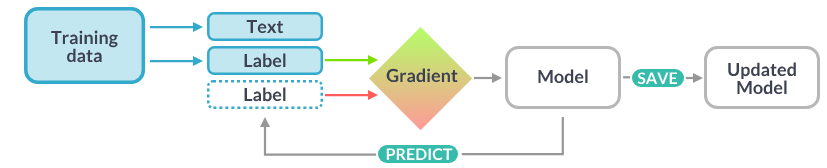

In [ ]:
# EXERCISE: Learn how to extend spaCy's NER models. Specifically, how to add new entity names and entity types.

### Practice

Tiền xử lý dữ liệu cho bộ dữ liệu:<Br>
Tiếng anh: imdb_rebiews <Br>
Tiếng việt: ntc-scv

# Additional Reading and Resources

Read through this page to learn more about spaCy's language processing pipeline including what's going on under the hood, how to create custom components, disable certain components (e.g. NER) when they're unneeded, optimization tips, and best practices:<br>
https://spacy.io/usage/processing-pipelines
<br><br>
Take the free and succinct spaCy course (available in multiple languages):<br>
https://course.spacy.io/
